**Importing all the libraries which will be used in the collab.**

In [399]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from tabulate import tabulate
from matplotlib import style

Importing the dataset, creating a sample and looking at the dataset.

In [400]:
"""df = pd.read_csv('/content/adverts.csv')
df = df.sample(1000, ignore_index=True)
df"""

"df = pd.read_csv('/content/adverts.csv')\ndf = df.sample(1000, ignore_index=True)\ndf"

saving the sample, to not keep getting a new sample each time.

In [401]:
"""df.to_csv('/content/L38544261_Ali_Hussain.csv')"""

"df.to_csv('/content/L38544261_Ali_Hussain.csv')"

Importing the sample and looking at sample dataset.by the method head which shows top 5 entries.

In [402]:
from operator import index
row1 = pd.read_csv('/content/L38544261_Ali_Hussain.csv', index_col=0)
row1.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202009033285488,19756.0,65,White,BMW,X3,USED,2015.0,19650,SUV,False,Diesel
1,202007171363808,14540.0,19,Red,Vauxhall,Corsa,USED,2019.0,9499,Hatchback,False,Petrol
2,202010225303538,64572.0,55,Grey,Peugeot,407 SW,USED,2006.0,2999,Estate,False,Petrol
3,202010014430340,29500.0,67,White,Volkswagen,Polo,USED,2017.0,11196,Hatchback,False,Petrol
4,202009013170281,25000.0,66,Blue,Volkswagen,Golf,USED,2016.0,12000,Hatchback,False,Petrol


Using tail methond which shows final 5 entries.

In [403]:
row1.tail()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
995,202010104846683,64000.0,62,Black,Nissan,Juke,USED,2012.0,5995,SUV,False,Diesel
996,202010295575932,40000.0,66,Silver,Mercedes-Benz,A Class,USED,2016.0,13995,Hatchback,False,Diesel
997,202003168485380,2351.0,20,Red,Jaguar,XF,USED,2020.0,28480,Saloon,False,Diesel
998,202010215269632,33000.0,12,Blue,Citroen,C5,USED,2012.0,7995,Estate,False,Diesel
999,202009284314954,6181.0,69,Grey,SKODA,Karoq,USED,2019.0,20490,SUV,False,Petrol


checking the coloumns and rows with shape method.

In [404]:
row1.shape

(1000, 12)

Now showing the total rows and columns with size method.

In [405]:
row1.size

12000

Info shows the number and name of columns with its dataset including total amount of columns for each row.

In [406]:
row1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       1000 non-null   int64  
 1   mileage                1000 non-null   float64
 2   reg_code               918 non-null    object 
 3   standard_colour        986 non-null    object 
 4   standard_make          1000 non-null   object 
 5   standard_model         1000 non-null   object 
 6   vehicle_condition      1000 non-null   object 
 7   year_of_registration   918 non-null    float64
 8   price                  1000 non-null   int64  
 9   body_type              1000 non-null   object 
 10  crossover_car_and_van  1000 non-null   bool   
 11  fuel_type              999 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 94.7+ KB


Columns shows the name of columns.

In [407]:
row1.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

dtype shows columns data types.

In [408]:
row1.dtypes

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

desribe shows the numerical values of the columns such as mean or minimum among others.

In [409]:
row1.describe()

,public_reference,mileage,year_of_registration,price
count,1.000000e+03,1000.000000,918.000000,1000.000000
mean,2.020073e+14,37833.749000,2014.837691,17222.831000
std,1.634167e+10,34408.796742,4.904632,27102.991316
min,2.017123e+14,0.000000,1961.000000,299.000000
25%,2.020090e+14,10207.500000,2013.000000,7490.000000
50%,2.020093e+14,28669.000000,2016.000000,11995.000000
75%,2.020102e+14,58000.000000,2018.000000,19073.750000
max,2.020110e+14,181422.000000,2020.000000,549850.000000


assigning name to each graph value with the column name.

In [410]:
standard_make = row1['standard_make']
standard_model = row1['standard_model']
body_type = row1['body_type']
standard_colour = row1['standard_colour']
price = row1['price']

The histogram shows the standard colors and their maximum prize value. The scale to the price is 1 to 100000.




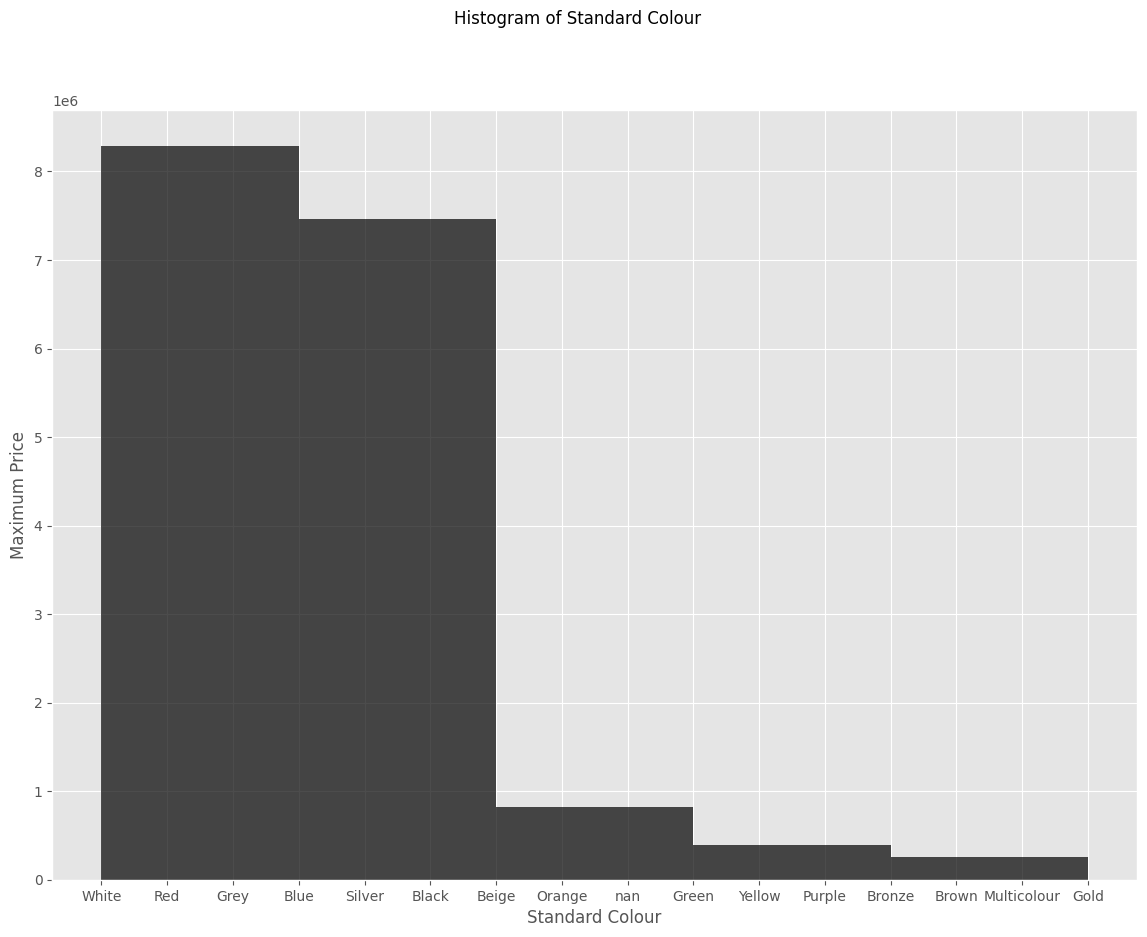

In [411]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(14, 10))
fig.suptitle('Histogram of Standard Colour')
plt.hist([str(x) for x in standard_colour], bins=5, color='Black', alpha=0.7, weights=price)
plt.xlabel('Standard Colour')
plt.ylabel('Maximum Price')
plt.grid(True)
plt.show()

The histogram shows the standard make and their maximum prize value. The scale to the price is 1 to 100000.


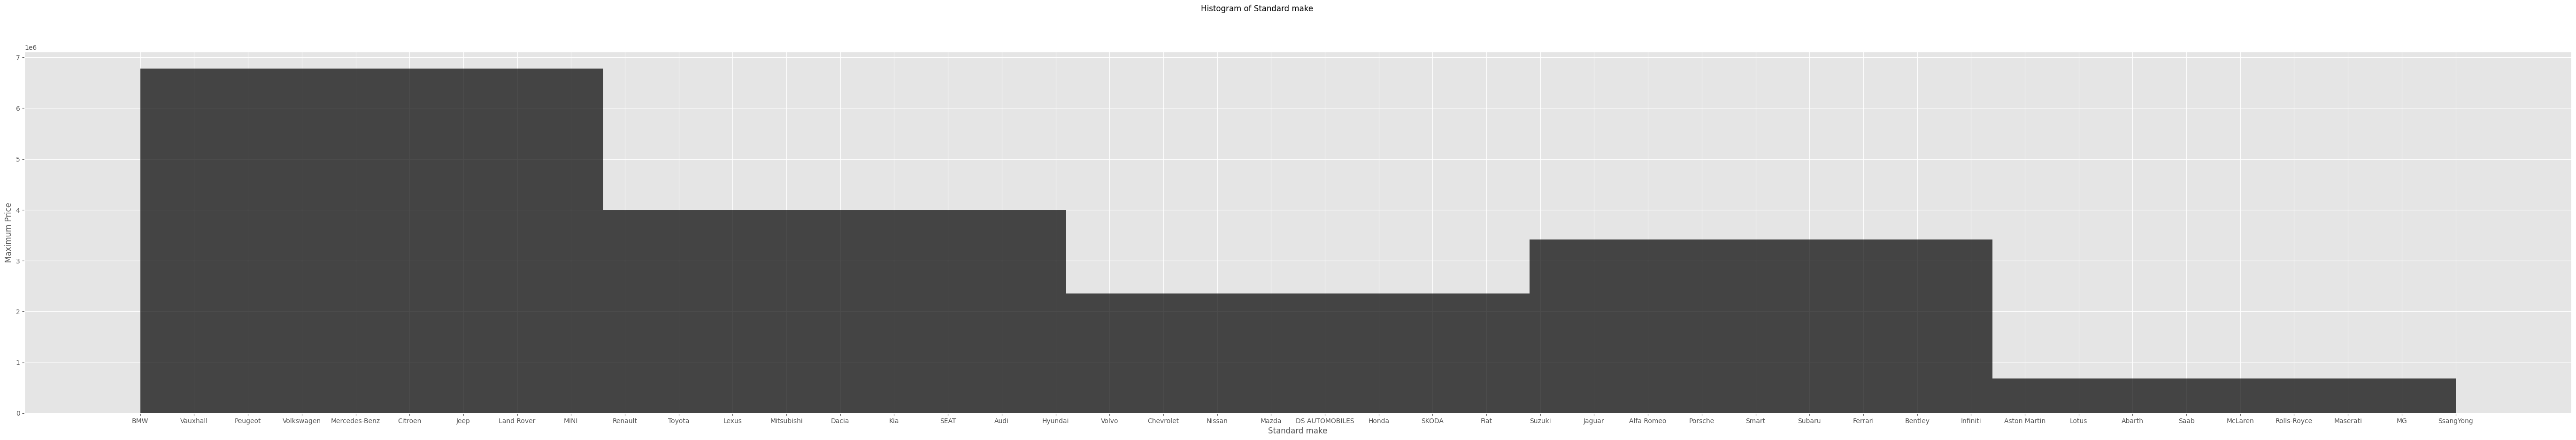

In [412]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(70, 10))
fig.suptitle('Histogram of Standard make')
plt.hist([str(x) for x in standard_make], bins=5, color='Black', alpha=0.7, weights=price)
plt.xlabel('Standard make')
plt.ylabel('Maximum Price')
plt.grid(True)
plt.show()

**DATA CLEANING**

Checking duplicate from the data.

In [413]:
row2 = row1.duplicated()
row2

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

Following code is to count all the duplicates if there's any.

In [414]:
row2 = row1.duplicated().sum()
row2

0

the following code is to check null values or empty cells.

In [415]:
row1.isnull()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False


Following code shows total empty cells in the dataset.

In [416]:
row1.isnull().sum()

public_reference          0
mileage                   0
reg_code                 82
standard_colour          14
standard_make             0
standard_model            0
vehicle_condition         0
year_of_registration     82
price                     0
body_type                 0
crossover_car_and_van     0
fuel_type                 1
dtype: int64

following code creates a heatmap which showcases the null values. the white spaces identify empty cells.

<Axes: >

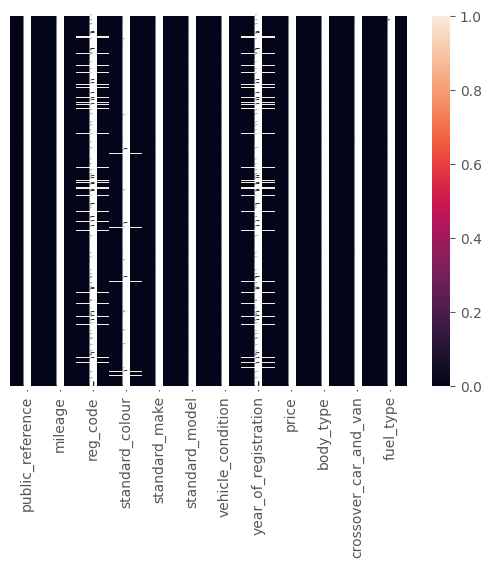

In [417]:
sns.heatmap(row1.isnull(), yticklabels=False, annot=True)

Filling object data type column with mode while other than object unsing mean to fill in which is in this case year of registration.



In [418]:
mean_year_of_registration = row1['year_of_registration'].mean()
mean_year_of_registration_without_decimals = math.floor(mean_year_of_registration)

# Fill missing cells in 'year_of_registration' column with the rounded mean
row1['year_of_registration'].fillna(mean_year_of_registration_without_decimals, inplace=True)

# Convert the 'year_of_registration' column to integer type
row1['year_of_registration'] = row1['year_of_registration'].astype(int)

In [419]:
row1['mileage'] = row1['mileage'].round().astype(int)

Removing alphabetic values from reg_code and checking unique values.

In [420]:
row1['reg_code'] = row1['reg_code'].replace('[^0-9]', '', regex=True)

print(row1['reg_code'].unique())

['65' '19' '55' '67' '66' '14' nan '61' '59' '68' '17' '18' '60' '11' '06'
 '08' '05' '69' '62' '12' '04' '13' '63' '16' '15' '64' '20' '09' '07'
 '10' '70' '57' '58' '53' '56' '54' '03' '' '52' '51' '02']


In [421]:
#follwing code is to save reg_code in column name variable.
column_name = 'reg_code'

# Calculating the mode of the column
mode_value = row1[column_name].mode()[0]

# Filling missing values with the mode
row1[column_name].fillna(mode_value, inplace=True)
#showing the empty rows in columns again to confirm if its filled in
row1.isnull().sum()

public_reference          0
mileage                   0
reg_code                  0
standard_colour          14
standard_make             0
standard_model            0
vehicle_condition         0
year_of_registration      0
price                     0
body_type                 0
crossover_car_and_van     0
fuel_type                 1
dtype: int64

In [422]:
#follwing code is to save mileage in column name variable.
column_name = 'mileage'

# Calculating the mode of the column
mode_value = row1[column_name].mode()[0]

# Filling missing values with the mode
row1[column_name].fillna(mode_value, inplace=True)
#showing the empty rows in columns again to confirm if its filled in
row1.isnull().sum()

public_reference          0
mileage                   0
reg_code                  0
standard_colour          14
standard_make             0
standard_model            0
vehicle_condition         0
year_of_registration      0
price                     0
body_type                 0
crossover_car_and_van     0
fuel_type                 1
dtype: int64

In [423]:
#follwing code is to save standard_colour in column name variable.
column_name = 'standard_colour'

# Calculating the mode of the column
mode_value = row1[column_name].mode()[0]

# Filling missing values with the mode
row1[column_name].fillna(mode_value, inplace=True)
#showing the empty rows in columns again to confirm if its filled in
row1.isnull().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                1
dtype: int64

In [424]:
#follwing code is to save body_type in column name variable.
column_name = 'body_type'

# Calculating the mode of the column
mode_value = row1[column_name].mode()[0]

# Filling missing values with the mode
row1[column_name].fillna(mode_value, inplace=True)
#showing the empty rows in columns again to confirm if its filled in
row1.isnull().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                1
dtype: int64

In [425]:
#follwing code is to save fuel_type in column name variable.
column_name = 'fuel_type'

# Calculating the mode of the column
mode_value = row1[column_name].mode()[0]

# Filling missing values with the mode
row1[column_name].fillna(mode_value, inplace=True)
#showing the empty rows in columns again to confirm if its filled in
row1.isnull().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

creating heatmap to show the difference after removing empty cells and it shows no empty cells.

<Axes: >

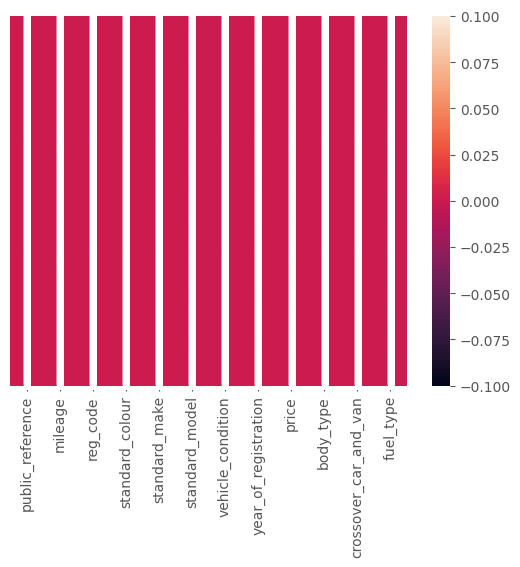

In [426]:
sns.heatmap(row1.isnull(), yticklabels=False, annot=True)

using Boxplot to identify outliers in the dataset.

In [427]:
#row1.boxplot(figsize=(15,7))

using scatterplot to show outliners in the mileage and price.

<Axes: xlabel='mileage', ylabel='price'>

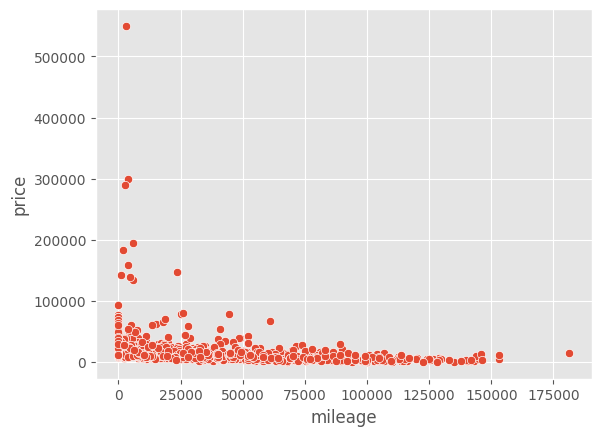

In [428]:
sns.scatterplot(x='mileage', y='price', data=row1)

In [429]:
# Removing outliers for columns 'price' and 'mileage' because they're Int dtype.
Q1_price = row1['price'].quantile(0.25)
Q3_price = row1['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

Q1_mileage = row1['mileage'].quantile(0.25)
Q3_mileage = row1['mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage
lower_bound_mileage = Q1_mileage - 1.5 * IQR_mileage
upper_bound_mileage = Q3_mileage + 1.5 * IQR_mileage

#Remove rows with outliers for 'price' and'mileage'.
price_outliers_mask = (row1['price'] < lower_bound_price) | (row1['price'] > upper_bound_price)
mileage_outliers_mask = (row1['mileage'] < lower_bound_mileage) | (row1['mileage'] > upper_bound_mileage)
outliers_mask = price_outliers_mask | mileage_outliers_mask

# Remove out rows with outliers
row1 = row1[~outliers_mask]

showing the scatterplot again to compare how the outliners were removed

<Axes: xlabel='mileage', ylabel='price'>

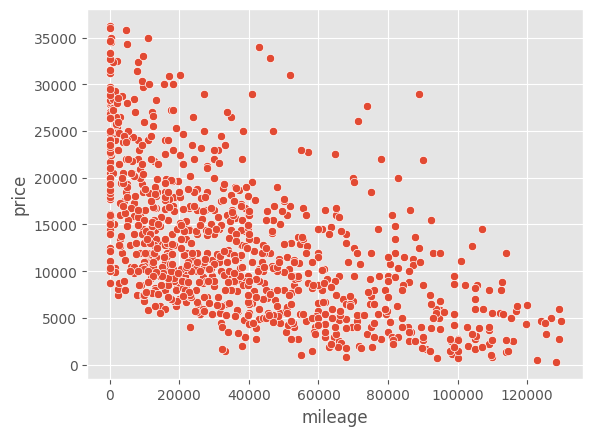

In [430]:
sns.scatterplot(x='mileage', y='price', data=row1)

Change column dtype to int because it was a bool.

In [431]:
boolean_column = 'crossover_car_and_van'
row1[boolean_column] = row1[boolean_column].astype(int)

In [432]:
"""poly = PolynomialFeatures(degree=5, interaction_only=True)
poly_features = poly.fit_transform(row1[['price', 'mileage']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['price', 'mileage']))
row1 = pd.concat([row1.reset_index(drop=True), poly_df], axis=1)"""

"poly = PolynomialFeatures(degree=5, interaction_only=True)\npoly_features = poly.fit_transform(row1[['price', 'mileage']])\npoly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['price', 'mileage']))\nrow1 = pd.concat([row1.reset_index(drop=True), poly_df], axis=1)"

**Encoding the dataset**

encoding one hot encoding to all the columns

In [433]:
encoded_species = pd.get_dummies(row1[["fuel_type", "body_type", "vehicle_condition",
                                     "standard_model", "standard_make", "standard_colour",
                                     "reg_code"]], prefix=["fuel_type", "body_type",
                                                            "vehicle_condition", "standard_model",
                                                            "standard_make", "standard_colour",
                                                            "reg_code"], drop_first=False).astype('int')
cleaned_row1 = pd.concat([row1, encoded_species], axis=1)


removing duplicate data

In [434]:
cleaned_row1.drop(columns=["fuel_type", "body_type", "vehicle_condition", "standard_model",
                        "standard_make", "standard_colour", "reg_code"], inplace=True)


checking if the columns are successfully converted.

In [435]:
cleaned_row1.head()

,public_reference,mileage,year_of_registration,price,crossover_car_and_van,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid,...,reg_code_61,reg_code_62,reg_code_63,reg_code_64,reg_code_65,reg_code_66,reg_code_67,reg_code_68,reg_code_69,reg_code_70
0,202009033285488,19756,2015,19650,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,202007171363808,14540,2019,9499,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,202010225303538,64572,2006,2999,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,202010014430340,29500,2017,11196,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,202009013170281,25000,2016,12000,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


saving the clean data

In [436]:
cleaned_row1.to_csv('Koyoko_clean_data.csv')

In [437]:
cleaned_row1

,public_reference,mileage,year_of_registration,price,crossover_car_and_van,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid,...,reg_code_61,reg_code_62,reg_code_63,reg_code_64,reg_code_65,reg_code_66,reg_code_67,reg_code_68,reg_code_69,reg_code_70
0,202009033285488,19756,2015,19650,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,202007171363808,14540,2019,9499,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,202010225303538,64572,2006,2999,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,202010014430340,29500,2017,11196,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,202009013170281,25000,2016,12000,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,202010104846683,64000,2012,5995,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
996,202010295575932,40000,2016,13995,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
997,202003168485380,2351,2020,28480,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,202010215269632,33000,2012,7995,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


removing any empty rows after encoding

In [438]:
cleaned_row1.isnull().sum()

public_reference         0
mileage                  0
year_of_registration     0
price                    0
crossover_car_and_van    0
                        ..
reg_code_66              0
reg_code_67              0
reg_code_68              0
reg_code_69              0
reg_code_70              0
Length: 357, dtype: int64

In [439]:
cleaned_row1.dropna(inplace=True)

In [440]:
cleaned_row1.isnull().sum()

public_reference         0
mileage                  0
year_of_registration     0
price                    0
crossover_car_and_van    0
                        ..
reg_code_66              0
reg_code_67              0
reg_code_68              0
reg_code_69              0
reg_code_70              0
Length: 357, dtype: int64

**Splitting and training the dataset**

In [462]:
cleaned_row1

,public_reference,mileage,year_of_registration,price,crossover_car_and_van,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid,...,reg_code_61,reg_code_62,reg_code_63,reg_code_64,reg_code_65,reg_code_66,reg_code_67,reg_code_68,reg_code_69,reg_code_70
0,202009033285488,19756,2015,19650,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,202007171363808,14540,2019,9499,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,202010225303538,64572,2006,2999,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,202010014430340,29500,2017,11196,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,202009013170281,25000,2016,12000,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,202010104846683,64000,2012,5995,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
996,202010295575932,40000,2016,13995,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
997,202003168485380,2351,2020,28480,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,202010215269632,33000,2012,7995,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [442]:
x = cleaned_row1.drop(["price"], axis=1)
y = cleaned_row1["price"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=40)

In [443]:
Model = tree.DecisionTreeRegressor()
regressor = tree.DecisionTreeRegressor()

In [444]:
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

Using r2 score to measure the accuracy.

In [445]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print('R-squared:', score )

R-squared: 0.5698967148445551


actual vs predicted price


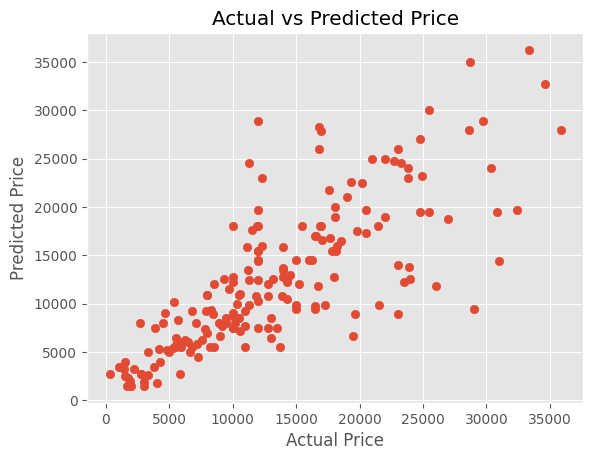

In [446]:
print("actual vs predicted price")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

Importing the DecisionTreeRegressor algorithm from the tree module and setting different parameters.


In [447]:
rand = tree.DecisionTreeRegressor()
param_distributors = {
    'max_depth': [10,20,30,40],          # Maximum depth of the tree
    'min_samples_split': [2,5,10,12],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1,2,4,5]        # Minimum number of samples required to be at a leaf node
}

In [448]:
random_search = RandomizedSearchCV(rand,param_distributors,n_iter=100,cv=5)

In [449]:
random_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.



RandomizedSearchCV(cv=7, estimator=DecisionTreeRegressor(), n_iter=100,
                   param_distributions={'max_depth': [10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 5, 10, 12]})

In [450]:
y_preda = random_search.predict(x_test)

In [451]:
y_preda

array([ 2833.6       ,  2833.6       ,  9465.84090909, 14422.27272727,
       20299.625     , 22782.375     ,  9465.84090909, 19323.66666667,
       21475.44444444, 16705.57142857, 20299.625     ,  2282.5       ,
       12968.25      ,  6345.63636364, 26663.11111111, 15838.71428571,
       18682.8       ,  6841.81818182,  6841.81818182, 19990.        ,
       13364.        , 12462.22222222,  5454.78947368,  9380.        ,
        6374.        , 13067.95454545, 19902.        , 26663.11111111,
        9465.84090909, 12968.25      , 22782.375     , 14618.125     ,
       23248.90909091,  6374.        , 33222.33333333, 30177.5       ,
        6103.72727273,  7225.        ,  9465.84090909, 14618.125     ,
       23248.90909091,  1475.9       , 22782.375     ,  7142.        ,
        5017.        ,  6340.        , 13067.95454545,  5454.78947368,
        7971.        , 13067.95454545, 18791.        ,  2291.63636364,
       20299.625     ,  6103.72727273,  4983.2       ,  1475.9       ,
      

In [452]:
acca = r2_score(y_test,y_preda)
acca

0.5850466905553979

In [453]:
!pip install shap

In [454]:
import shap
exp = shap.TreeExplainer(regressor,x_test)
shap_values = exp.shap_values(x_test)

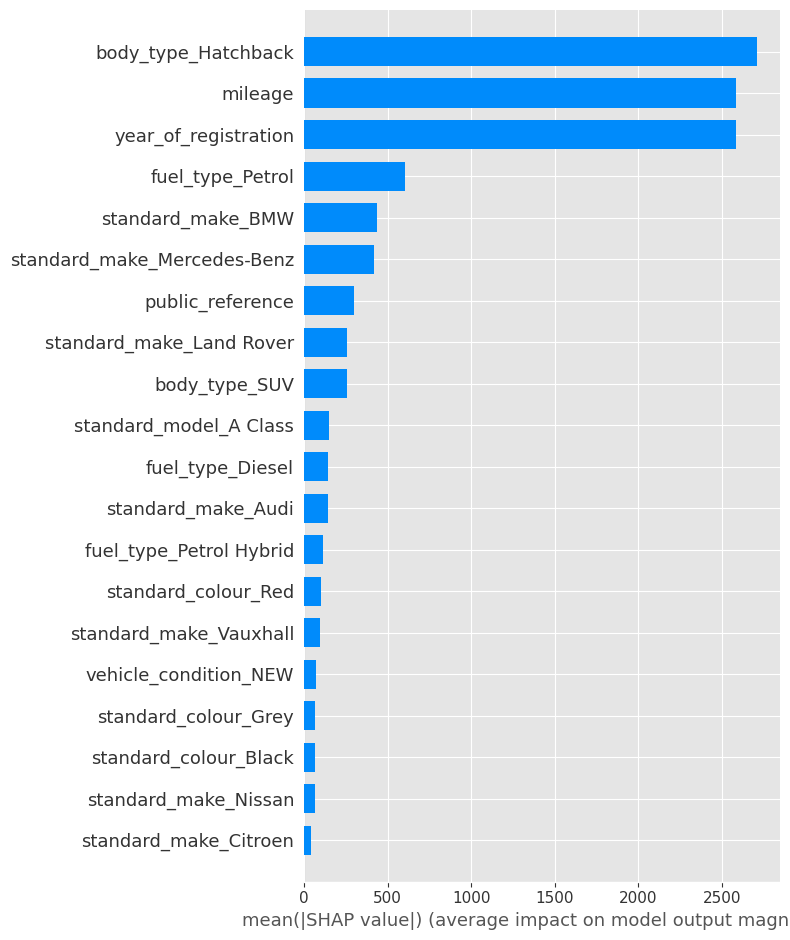

In [455]:
shap.summary_plot(shap_values,x_test,plot_type='bar')

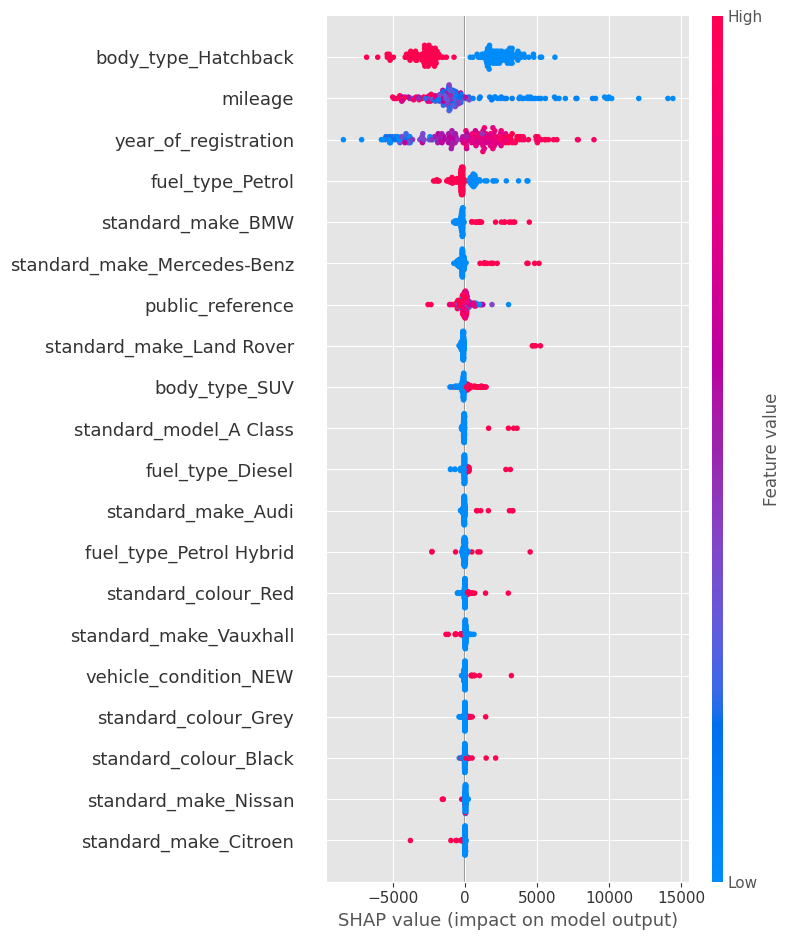

In [456]:
shap.summary_plot(shap_values, x_test)

In [457]:
!pip install explainerdashboard

In [458]:
from explainerdashboard import RegressionExplainer, ExplainerDashboard

In [459]:
explainer = RegressionExplainer(regressor,x_test,y_test)

Generating self.shap_explainer = shap.TreeExplainer(model)


In [460]:
ExplainerDashboard(explainer).run()

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:550: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)


TypeError: 'NoneType' object cannot be interpreted as an integer